# 2. Probability Distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.rv import (
    Bernoulli,
    Beta,
    Categorical,
    Dirichlet,
    Gamma,
    Gaussian,
    MultivariateGaussian,
    MultivariateGaussianMixture,
    StudentsT,
    Uniform
)

np.random.seed(1234)

## 2.1 Binary Variables

In [2]:
model = Bernoulli()
model.fit(np.array([0., 1., 1., 1.]))
print(model)

Bernoulli(
    mu=0.75
)


### 2.1.1 The beta distributions

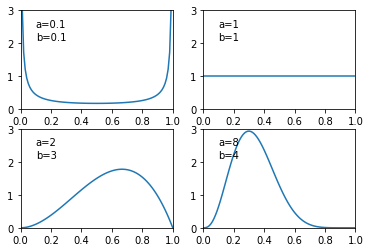

In [3]:
x = np.linspace(0, 1, 100)
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    plt.subplot(2, 2, i + 1)
    beta = Beta(a, b)
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    plt.plot(x, beta.pdf(x))
    plt.annotate("a={}".format(a), (0.1, 2.5))
    plt.annotate("b={}".format(b), (0.1, 2.1))
plt.show()

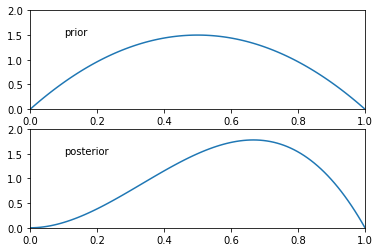

In [4]:
beta = Beta(2, 2)
plt.subplot(2, 1, 1)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, beta.pdf(x))
plt.annotate("prior", (0.1, 1.5))

model = Bernoulli(mu=beta)
model.fit(np.array([1]))
plt.subplot(2, 1, 2)
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.plot(x, model.mu.pdf(x))
plt.annotate("posterior", (0.1, 1.5))

plt.show()

In [5]:
print("Maximum likelihood estimation")
model = Bernoulli()
model.fit(np.array([1]))
print("{} out of 10000 is 1".format(model.draw(10000).sum()))

print("Bayesian estimation")
model = Bernoulli(mu=Beta(1, 1))
model.fit(np.array([1]))
print("{} out of 10000 is 1".format(model.draw(10000).sum()))

Maximum likelihood estimation
10000 out of 10000 is 1
Bayesian estimation
6649 out of 10000 is 1


## 2.2 Multinomial Variables

In [6]:
model = Categorical()
model.fit(np.array([[0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1]]))
print(model)

Categorical(
    mu=[0.5  0.25 0.25]
)


### 2.2.1 The Dirichlet distribution

In [7]:
mu = Dirichlet(alpha=np.ones(3))
model = Categorical(mu=mu)
print(model)

model.fit(np.array([[1., 0., 0.], [1., 0., 0.], [0., 1., 0.]]))
print(model)

Categorical(
    mu=Dirichlet(
        alpha=[1. 1. 1.]
    )
)
Categorical(
    mu=Dirichlet(
        alpha=[3. 2. 1.]
    )
)


## 2.3 The Gaussian Distribution

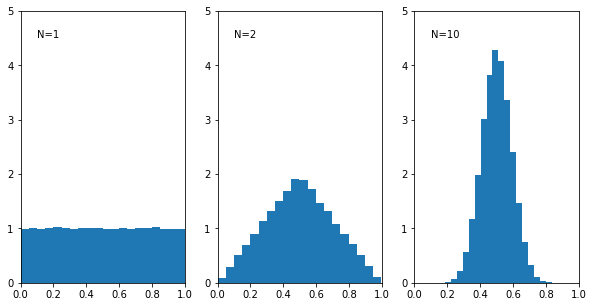

In [8]:
uniform = Uniform(low=0, high=1)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.annotate("N=1", (0.1, 4.5))
plt.hist(uniform.draw(100000), bins=20, density=True)

plt.subplot(1, 3, 2)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.annotate("N=2", (0.1, 4.5))
plt.hist(0.5 * (uniform.draw(100000) + uniform.draw(100000)), bins=20, density=True)

plt.subplot(1, 3, 3)
plt.xlim(0, 1)
plt.ylim(0, 5)
sample = 0
for _ in range(10):
    sample = sample + uniform.draw(100000)
plt.annotate("N=10", (0.1, 4.5))
plt.hist(sample * 0.1, bins=20, density=True)

plt.show()

### 2.3.4 Maximum Likelihood for the Gaussian

MultivariateGaussian(
    mu=[0.91852581 1.17919155]
    cov=[[4.29224408 0.1551223 ]
 [0.1551223  3.58170912]]
)


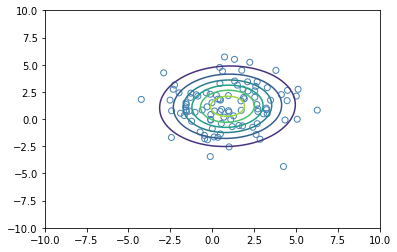

In [9]:
X = np.random.normal(loc=1., scale=2., size=(100, 2))
gaussian = MultivariateGaussian()
gaussian.fit(X)
print(gaussian)

x, y = np.meshgrid(
    np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
p = gaussian.pdf(
    np.array([x, y]).reshape(2, -1).T).reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1], facecolor="none", edgecolor="steelblue")
plt.contour(x, y, p)
plt.show()

### 2.3.6 Bayesian inference for the Gaussian

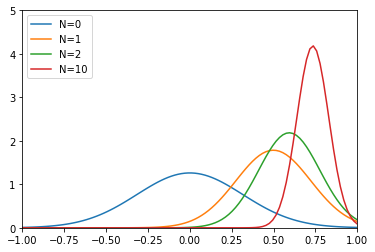

In [10]:
mu = Gaussian(0, 0.1)
model = Gaussian(mu, 0.1)

x = np.linspace(-1, 1, 100)
plt.plot(x, model.mu.pdf(x), label="N=0")

model.fit(np.random.normal(loc=0.8, scale=0.1, size=1))
plt.plot(x, model.mu.pdf(x), label="N=1")

model.fit(np.random.normal(loc=0.8, scale=0.1, size=1))
plt.plot(x, model.mu.pdf(x), label="N=2")

model.fit(np.random.normal(loc=0.8, scale=0.1, size=8))
plt.plot(x, model.mu.pdf(x), label="N=10")

plt.xlim(-1, 1)
plt.ylim(0, 5)
plt.legend()
plt.show()

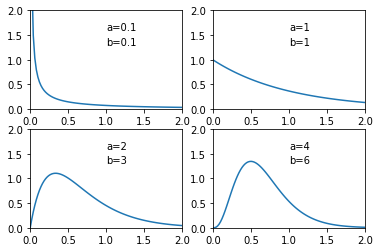

In [11]:
x = np.linspace(0, 2, 100)
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [4, 6]]):
    plt.subplot(2, 2, i + 1)
    gamma = Gamma(a, b)
    plt.xlim(0, 2)
    plt.ylim(0, 2)
    plt.plot(x, gamma.pdf(x))
    plt.annotate("a={}".format(a), (1, 1.6))
    plt.annotate("b={}".format(b), (1, 1.3))
plt.show()

In [12]:
tau = Gamma(a=1, b=1)
model = Gaussian(mu=0, tau=tau)
print(model)

model.fit(np.random.normal(scale=1.414, size=100))
print(model)

Gaussian(
    mu=0
    tau=Gamma(
        a=1
        b=1
    )
    var=None
)
Gaussian(
    mu=0
    tau=Gamma(
        a=51.0
        b=94.73272357871433
    )
    var=None
)


### 2.3.7 Student's t-distribution

Gaussian(
    mu=2.2695020512383577
    var=46.95748684941486
    tau=0.02129585859666723
)
StudentsT(
    mu=-0.1946342109447806
    tau=1.4665461746068318
    dof=0.9028354354811657
)


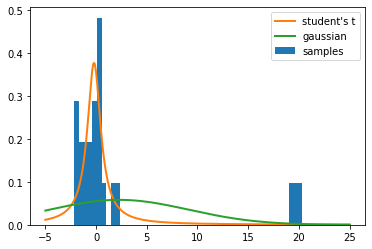

In [13]:
X = np.random.normal(size=20)
X = np.concatenate([X, np.random.normal(loc=20., size=3)])
plt.hist(X.ravel(), bins=50, density=1., label="samples")

students_t = StudentsT()
gaussian = Gaussian()

gaussian.fit(X)
students_t.fit(X)

print(gaussian)
print(students_t)

x = np.linspace(-5, 25, 1000)
plt.plot(x, students_t.pdf(x), label="student's t", linewidth=2)
plt.plot(x, gaussian.pdf(x), label="gaussian", linewidth=2)
plt.legend()
plt.show()

### 2.3.9 Mixture of Gaussians

MultivariateGaussianMixture(
    mu=[[ 5.06087392 -5.07813706]
 [-4.9724865  -5.09928156]
 [-0.05584106  4.99523381]]
    cov=[[[ 1.11567912 -0.01717074]
  [-0.01717074  1.04457722]]

 [[ 0.89251355 -0.0138146 ]
  [-0.0138146   1.07986159]]

 [[ 0.81797404  0.03778106]
  [ 0.03778106  0.93690783]]]
    coef=[0.33333333 0.33333333 0.33333333]
)


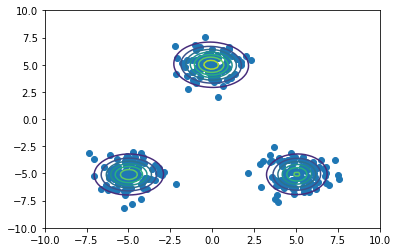

In [14]:
x1 = np.random.normal(size=(100, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(100, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(100, 2))
x3 += np.array([0, 5])
X = np.vstack((x1, x2, x3))

model = MultivariateGaussianMixture(n_components=3)
model.fit(X)
print(model)

x_test, y_test = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).transpose()
probs = model.pdf(X_test)
Probs = probs.reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1])
plt.contour(x_test, y_test, Probs)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()